#### 卷积神经网络分类猫-狗图像数据集

**数据准备**
+ 将以目录形式保存图像文件导入为dataset形式
+ 训练数据：1000幅图像
+ 验证数据：500幅图像
+ 测试数据：500幅图像
+ 类别：猫和狗两个类别
+ 图像统一规格化为$150\times150$大小，划分每个batch为20个样本

In [1]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dir = 'cats_and_dogs_small/train'
validation_dir = 'cats_and_dogs_small/validation'
test_dir = 'cats_and_dogs_small/test'

train_dataset = image_dataset_from_directory(train_dir,labels='inferred',image_size=(150,150),batch_size=20,label_mode='binary')
validation_dataset = image_dataset_from_directory(validation_dir,labels='inferred',image_size=(150,150),batch_size=20,label_mode='binary')
test_dataset = image_dataset_from_directory(test_dir,labels='inferred',image_size=(150,150),batch_size=20,label_mode='binary')

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**构建网络**
+ 卷积层1：32个$3\times3$的卷积核
+ 池化层1：最大值池化为一半分辨率
+ 卷积层2：64个$3\times3$的卷积核
+ 池化层2：最大值池化为一半分辨率
+ 卷积层3：128个$3\times3$的卷积核
+ 池化层3：最大值池化为一半分辨率
+ 全连接层：512个神经元
+ 输出层：1个神经元，激活函数sigmoid

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

network = models.Sequential()
network.add(layers.Input(shape=(150,150,3)))
network.add(layers.Conv2D(32, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(64, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(128, (3, 3), activation='relu'))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Flatten())
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**学习网络**
+ 优化算法：RMSprop，学习率$0.0001$
+ 损失函数：binary_crossentropy
+ 以分类正确率作为度量指标
+ 学习30个回合，每个回合迭代100个batch，每个batch为20个训练样本
+ 学习样本为训练集dataset
+ 验证集dataset仅作为观察数据，每50次迭代观察一次

In [3]:
from tensorflow.keras import optimizers

network.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])
history = network.fit(train_dataset,steps_per_epoch=100,epochs=30, validation_data=validation_dataset,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 45ms/step - loss: 3.2598 - acc: 0.5130 - val_loss: 1.0347 - val_acc: 0.5130
Epoch 2/30
100/100 [==============================] - 4s 44ms/step - loss: 0.6902 - acc: 0.5935 - val_loss: 0.7784 - val_acc: 0.5690
Epoch 3/30
100/100 [==============================] - 5s 45ms/step - loss: 0.5784 - acc: 0.7070 - val_loss: 0.7096 - val_acc: 0.6150
Epoch 4/30
100/100 [==============================] - 4s 44ms/step - loss: 0.4588 - acc: 0.7700 - val_loss: 0.7902 - val_acc: 0.6200
Epoch 5/30
100/100 [==============================] - 4s 45ms/step - loss: 0.3759 - acc: 0.8315 - val_loss: 0.7377 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 4s 45ms/step - loss: 0.3008 - acc: 0.8650 - val_loss: 0.8492 - val_acc: 0.6760
Epoch 7/30
100/100 [==============================] - 5s 45ms/step - loss: 0.2339 - acc: 0.9015 - val_loss: 0.9019 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 5s 46ms/step -

**测试网络**
+ 分别使用训练集、验证集和测试集评估网络

In [4]:
train_loss, train_acc = network.evaluate(train_dataset)
validation_loss, validation_acc = network.evaluate(validation_dataset)
test_loss, test_acc = network.evaluate(test_dataset)

print('\nTrain Accuracy:     ', train_acc)
print('Validation Accuracy:', validation_acc)
print('Test Accuracy:      ', test_acc)

50/50 [==============================] - 1s 15ms/step - loss: 2.5902 - acc: 0.6720

Train Accuracy:      0.9909999966621399
Validation Accuracy: 0.6600000262260437
Test Accuracy:       0.671999990940094


**显示网络的过学习现象**
+ 显示学习过程中训练集和验证集数据的正确率变化

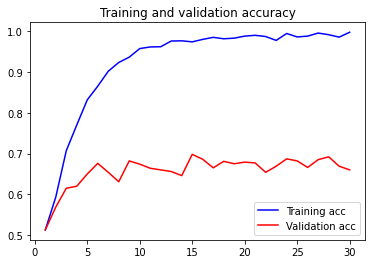

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()